# Runtimeanalysis for Metro dataset

In [1]:
# std
import os
import sys
import inspect
import time
import pathlib
import glob
from math import sqrt
from math import log2
# packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

# packages
from matplotlib.colors import ListedColormap

# for selection the right path
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.regression_plotfunctions import *



In [37]:
def plot_CV_with_Std(df, y = "R2_score", regressor = "sklearn", titel = "score vs stabdartdeviation", SaveName = False):
    kmax  = np.max(df["k"])
    list_k = np.linspace(1, kmax, num=kmax)
    std_list = np.zeros(kmax)
    mean_list = np.zeros(kmax)
    for k in list_k:
        df_tmp = df[df["k"] == k]
        std_list[int(k-1)] = np.std(df_tmp[y])
        mean_list[int(k-1)] = np.mean(df_tmp[y])
    plt.semilogy(list_k, mean_list, '-', label = regressor)
    plt.fill_between(list_k, mean_list - std_list, mean_list + std_list, alpha=0.2)
    plt.grid()
    plt.legend(loc="center right")
    plt.xlabel("k-splits")
    plt.title(titel)
    plt.ylabel(y)
    print(std_list)
    if SaveName:
        plt.savefig(SaveName)

            
            

In [18]:
def plot_TTS(df, y = "R2_score", regressor = "sklearn", titel = "score vs stabdartdeviation", SaveName = False):
    plt.plot(df, mean_list, '-', label = regressor)
    #plt.fill_between(list_k, mean_list - std_list, mean_list + std_list, alpha=0.2)
    plt.grid()
    plt.legend()
    plt.xlabel("k-splits")
    plt.title(titel)
    plt.ylabel(y)
    if SaveName:
        plt.savefig(SaveName)

## SGD

In [19]:
df_CV_SGD_raw = pd.read_csv("out/SGD/sklearn_CV_SGD_raw.csv")
df_CV_my_SGD_raw = pd.read_csv("out/SGD/my_CV_SGD_raw.csv")
df_CV_SGD_transforamtion = pd.read_csv("out/SGD/sklearn_CV_SGD_transforamtion.csv")
df_CV_my_SGD_transforamtion = pd.read_csv("out/SGD/my_CV_SGD_transforamtion.csv")

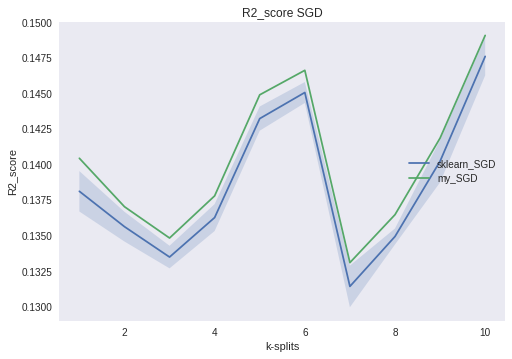

In [20]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_SGD_raw,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "R2_score",regressor = "my_SGD",titel="R2_score SGD")
plt.grid()
plt.savefig("out/SGD/CV_Plot_my_vs_sklearn_SGD_R2_raw")

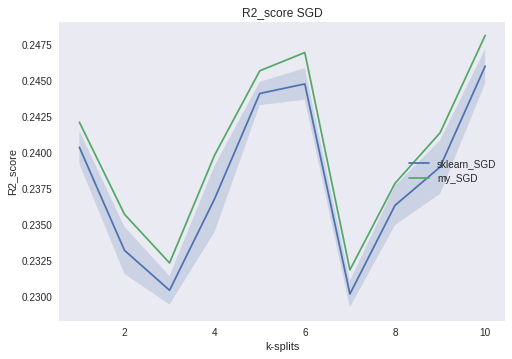

In [21]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_SGD_transforamtion,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_transforamtion,y = "R2_score",regressor = "my_SGD",titel="R2_score SGD")
plt.grid()
plt.savefig("out/SGD/CV_Plot_my_vs_sklearn_SGD_R2_transforamtion")

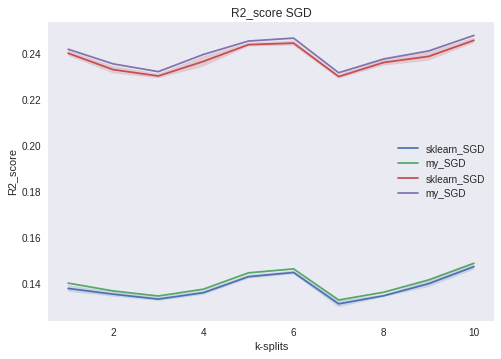

In [22]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_SGD_raw,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "R2_score",regressor = "my_SGD",titel="CV Plot")
plot_CV_with_Std(df_CV_SGD_transforamtion,y = "R2_score",regressor = "sklearn_SGD")
plot_CV_with_Std(df_CV_my_SGD_transforamtion,y = "R2_score",regressor = "my_SGD",titel="R2_score SGD")
plt.grid()
plt.savefig("out/SGD/CV_Plot_my_vs_sklearn_SGD_R2")

## KNN

In [23]:
df_CV_KNN_transforamtion = pd.read_csv("out/KNN/sklearn_CV_KNN_transformation.csv")
df_CV_KNN_raw = pd.read_csv("out/KNN/sklearn_CV_KNN_raw.csv")
df_CV_my_KNN_transforamtion = pd.read_csv("out/KNN/my_CV_KNN_transformation.csv")
df_CV_my_KNN_raw = pd.read_csv("out/KNN/my_CV_KNN_raw.csv")

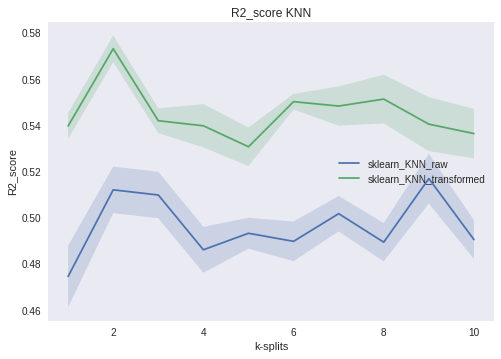

In [24]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_KNN_raw,y = "R2_score",regressor = "sklearn_KNN_raw",titel="R2_score KNN")
plot_CV_with_Std(df_CV_KNN_transforamtion,y = "R2_score",regressor = "sklearn_KNN_transformed",titel="R2_score KNN")
plt.grid()
plt.savefig("out/KNN/CV_Plot_my_vs_sklearn_KNN_R2")

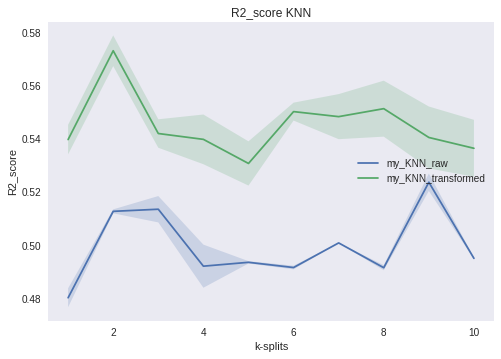

In [26]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_my_KNN_raw,y = "R2_score",regressor = "my_KNN_raw",titel="R2_score myKNN")
plot_CV_with_Std(df_CV_my_KNN_transforamtion,y = "R2_score",regressor = "my_KNN_transformed",titel="R2_score KNN")

plt.grid()
plt.savefig("out/KNN/CV_Plot_my_vs_sklearn_myKNN_R2")

## RM-sklearn

In [11]:
df_CV_RF_transforamtion = pd.read_csv("out/RF/sklearn_CV_RF_transforamtion.csv")
df_CV_RF_raw = pd.read_csv("out/RF/sklearn_CV_RF_raw.csv")

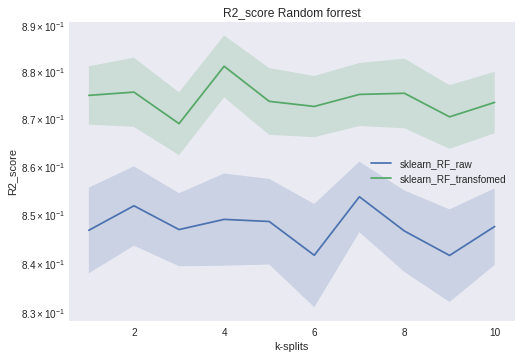

In [12]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_RF_raw,y = "R2_score",regressor = "sklearn_RF_raw")
plot_CV_with_Std(df_CV_RF_transforamtion,y = "R2_score",regressor = "sklearn_RF_transfomed",titel="R2_score Random forrest")
plt.grid()
plt.savefig("out/RF/CV_Plot_sklearn_RF_R2")

## DT-sklearn

In [13]:
df_CV_DT_transforamtion = pd.read_csv("out/DT/sklearn_CV_DT_transforamtion.csv")
df_CV_DT_raw = pd.read_csv("out/DT/sklearn_CV_DT_raw.csv")

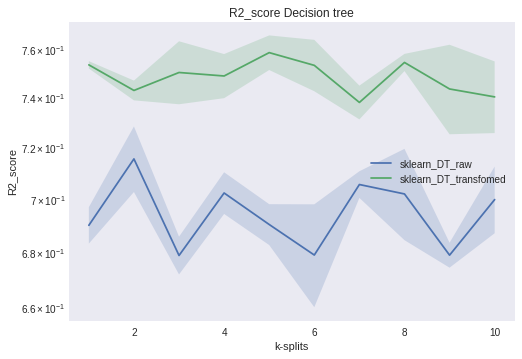

In [14]:
mpl.style.use('seaborn')
plot_CV_with_Std(df_CV_DT_raw,y = "R2_score",regressor = "sklearn_DT_raw")
plot_CV_with_Std(df_CV_DT_transforamtion,y = "R2_score",regressor = "sklearn_DT_transfomed",titel="R2_score Decision tree")
plt.grid()
plt.savefig("out/DT/CV_Plot_sklearn_DT_R2")

## runtime

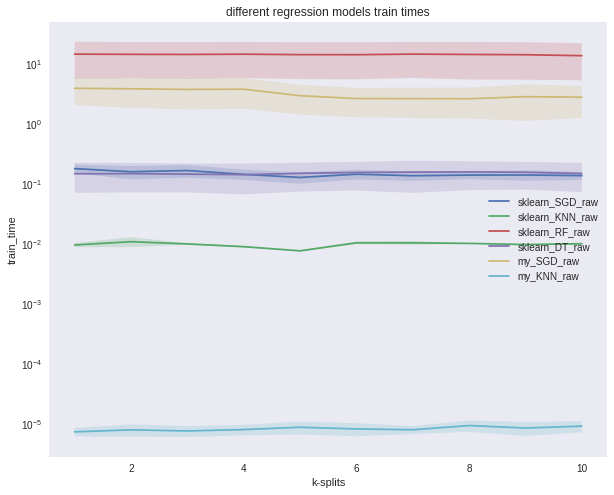

In [29]:
mpl.style.use('seaborn')
plt.figure(figsize=(10,8))
plot_CV_with_Std(df_CV_SGD_raw,y = "train_time",regressor = "sklearn_SGD_raw")
plot_CV_with_Std(df_CV_KNN_raw,y = "train_time",regressor = "sklearn_KNN_raw")
plot_CV_with_Std(df_CV_RF_raw,y = "train_time",regressor = "sklearn_RF_raw")
plot_CV_with_Std(df_CV_DT_raw,y = "train_time",regressor = "sklearn_DT_raw")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "train_time",regressor = "my_SGD_raw")
plot_CV_with_Std(df_CV_my_KNN_raw,y = "train_time",regressor = "my_KNN_raw",titel="different regression models train times")
plt.grid()
plt.savefig("out/runtimes/diff_traintimes")


[8.15271930e-05 5.04927104e-04 5.20734269e-04 1.42047326e-03
 5.64779903e-03 5.50381686e-05 1.39757596e-03 6.79544219e-04
 5.45238849e-04 3.17664385e-03]
[0.2404958  0.23583796 0.23942208 0.25307555 0.23441487 0.23858464
 0.24439025 0.23561566 0.22465046 0.22857442]
[2.50569218e-04 3.31345617e-04 4.37149854e-05 3.04827288e-04
 2.79289724e-04 4.60192863e-04 5.10486131e-04 5.98083290e-04
 4.35035334e-04 4.60827418e-04]
[6.16409275e-04 1.13251988e-03 1.43693018e-03 1.04480355e-03
 1.67930467e-05 1.89035781e-05 1.05406681e-04 2.11988490e-04
 4.40559480e-04 9.45833210e-04]
[0.02000554 0.01526654 0.03648725 0.01309979 0.02194177 0.01318218
 0.02151396 0.09155987 0.02344423 0.01361085]


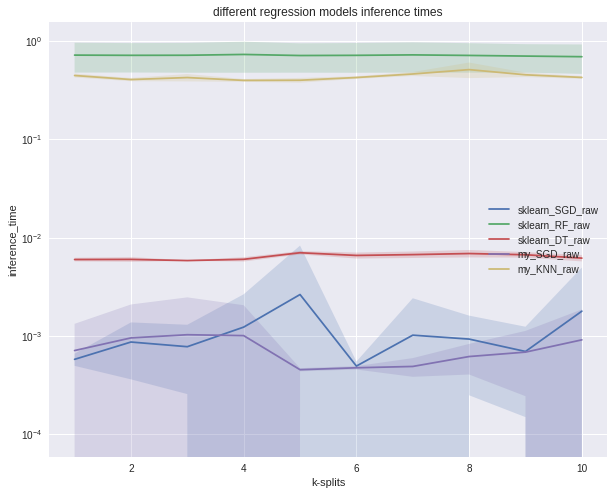

In [39]:
mpl.style.use('seaborn')
plt.figure(figsize=(10,8))
plot_CV_with_Std(df_CV_SGD_raw,y = "inference_time",regressor = "sklearn_SGD_raw")
#plot_CV_with_Std(df_CV_KNN_raw,y = "inference_time",regressor = "sklearn_KNN_raw")
plot_CV_with_Std(df_CV_RF_raw,y = "inference_time",regressor = "sklearn_RF_raw")
plot_CV_with_Std(df_CV_DT_raw,y = "inference_time",regressor = "sklearn_DT_raw")
plot_CV_with_Std(df_CV_my_SGD_raw,y = "inference_time",regressor = "my_SGD_raw")
plot_CV_with_Std(df_CV_my_KNN_raw,y = "inference_time",regressor = "my_KNN_raw",titel="different regression models inference times")
plt.grid()
plt.savefig("out/runtimes/diff_inferencetimes")

[0.23709708 0.26347979 0.25983451 0.21309356 0.1758903  0.26651243
 0.26218461 0.26012383 0.26147806 0.25123708]


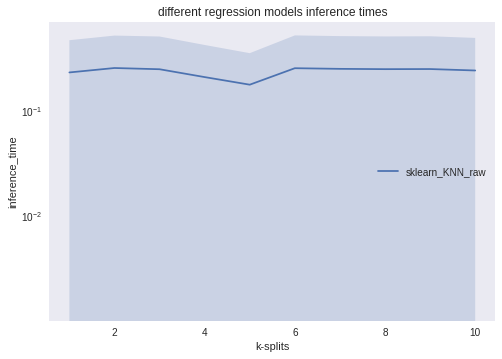

In [38]:
plot_CV_with_Std(df_CV_KNN_raw,y = "inference_time",regressor = "sklearn_KNN_raw",titel="different regression models inference times")

In [35]:
df_CV_KNN_raw

,weights,n_neighbors,p,train_time,inference_time,k,R2_score,RMSE,D,N,n_test,n_train
0,uniform,5,1,0.011171,0.072420,1,0.452094,2.227199e+06,10,4999,1500,3499
1,uniform,5,2,0.009461,0.054120,1,0.475845,2.130654e+06,10,4999,1500,3499
2,uniform,5,3,0.009429,0.543851,1,0.465818,2.171412e+06,10,4999,1500,3499
3,uniform,10,1,0.008974,0.072421,1,0.494400,2.055228e+06,10,4999,1500,3499
4,uniform,10,2,0.009512,0.058490,1,0.483802,2.098309e+06,10,4999,1500,3499
5,uniform,10,3,0.008910,0.588877,1,0.475993,2.130052e+06,10,4999,1500,3499
6,uniform,5,1,0.010397,0.067897,2,0.506278,1.994167e+06,10,4999,1500,3499
7,uniform,5,2,0.009612,0.057356,2,0.513487,1.965049e+06,10,4999,1500,3499
8,uniform,5,3,0.009588,0.593727,2,0.505612,1.996857e+06,10,4999,1500,3499
9,uniform,10,1,0.015369,0.090823,2,0.532895,1.886657e+06,10,4999,1500,3499
